In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\Daily+temperature+data.csv")

In [41]:
df.head(50)

,Temperature(Min)
Date,
01-01-2017,14.3
01-02-2017,17.4
01-03-2017,18.5
01-04-2017,16.8
01-05-2017,11.5
01-06-2017,9.5
01-07-2017,12.2
01-08-2017,15.7
01-09-2017,16.3


In [4]:
df = df.set_index('Date')

In [43]:
len(df)

730

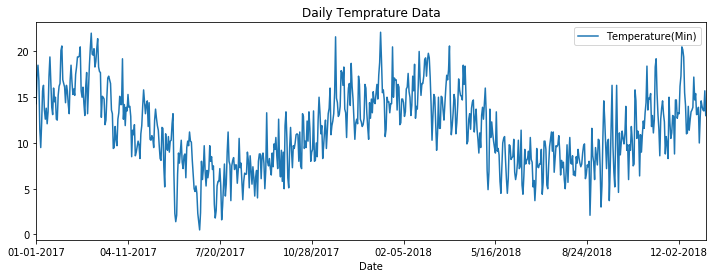

In [5]:
df.plot(figsize=(12,4))
plt.title("Daily Temprature Data")
plt.legend(loc='best')
plt.show()

In [6]:
df.isna().sum()

Temperature(Min)    0
dtype: int64

In [7]:
train_len = 511
train = df[0:train_len]
test = df[train_len:]

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
model = SimpleExpSmoothing(train['Temperature(Min)'])
model_fit = model.fit(smoothing_level = 0.2, optimized = False)
model_fit.params
y_hat_ses = test.copy()
print(len(y_hat_ses))
y_hat_ses['SES_Forecast'] = model_fit.forecast(219)

219


In [10]:
y_hat_ses

,Temperature(Min),SES_Forecast
Date,,
5/27/2018,8.2,9.1997
5/28/2018,6.1,9.1997
5/29/2018,4.5,9.1997
5/30/2018,6.1,9.1997
5/31/2018,9.8,9.1997
...,...,...
12/27/2018,14.0,9.1997
12/28/2018,13.6,9.1997
12/29/2018,13.5,9.1997


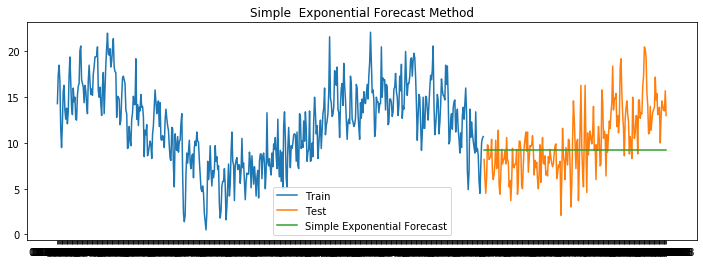

In [11]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'],label = 'Train')
plt.plot(test['Temperature(Min)'],label = 'Test')
plt.plot(y_hat_ses['SES_Forecast'],label = 'Simple Exponential Forecast')
plt.legend(loc='best')
plt.title("Simple  Exponential Forecast Method")
plt.show()

In [12]:
y_hat_ses['SES_Forecast']

Date
5/27/2018     9.1997
5/28/2018     9.1997
5/29/2018     9.1997
5/30/2018     9.1997
5/31/2018     9.1997
               ...  
12/27/2018    9.1997
12/28/2018    9.1997
12/29/2018    9.1997
12/30/2018    9.1997
12/31/2018    9.1997
Name: SES_Forecast, Length: 219, dtype: float64

In [13]:
test['Temperature(Min)']

Date
5/27/2018      8.2
5/28/2018      6.1
5/29/2018      4.5
5/30/2018      6.1
5/31/2018      9.8
              ... 
12/27/2018    14.0
12/28/2018    13.6
12/29/2018    13.5
12/30/2018    15.7
12/31/2018    13.0
Name: Temperature(Min), Length: 219, dtype: float64

In [14]:
from sklearn.metrics import mean_squared_error
#RMSE
rmse_ses = np.sqrt(mean_squared_error(test["Temperature(Min)"], y_hat_ses['SES_Forecast'])).round(2)
#MAPE
mape_ses = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_ses['SES_Forecast'])/test['Temperature(Min)'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['Simple Exponential Smoothing Method'],"MAPE":[mape_ses], "RMSE":[rmse_ses]})

tempresults1

,Methods,MAPE,RMSE
0,Simple Exponential Smoothing Method,30.24,3.56


## Holt's Exponential Smoothing Method using trends

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [16]:
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']),seasonal_periods = 90,trend='additive',seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()

y_hat_holt['HOLT_Forecast'] = model_fit.forecast(219)

{'smoothing_level': 0.6635953952934392, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 15.331705316136581, 'initial_slope': 0.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


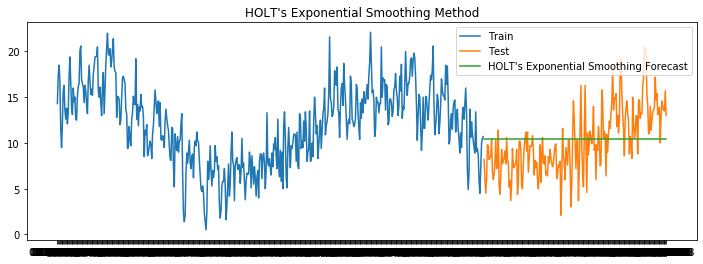

In [17]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'],label = 'Train')
plt.plot(test['Temperature(Min)'],label = 'Test')
plt.plot(y_hat_holt['HOLT_Forecast'],label = 'HOLT\'s Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title("HOLT\'s Exponential Smoothing Method")
plt.show()

In [18]:
#RMSE
rmse_holt = np.sqrt(mean_squared_error(test["Temperature(Min)"], y_hat_holt['HOLT_Forecast'])).round(2)
#MAPE
mape_holt = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_holt['HOLT_Forecast'])/test['Temperature(Min)'])*100,2)

tempresults2 = pd.DataFrame({"Methods":['HOLT\'s Exponential Smoothing Method'],"MAPE":[mape_holt],'RMSE':[rmse_holt]})
result = pd.concat([tempresults1,tempresults2])
result

,Methods,MAPE,RMSE
0,Simple Exponential Smoothing Method,30.24,3.56
0,HOLT's Exponential Smoothing Method,34.41,3.45


## Holt-Winters Additive Method with Trend and Seasonality

In [27]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']), seasonal_periods = 30, trend = 'add', seasonal = 'add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['HWA_Forecast'] = model_fit.forecast(219)

{'smoothing_level': 0.6746181790382475, 'smoothing_slope': 2.9104944726839204e-25, 'smoothing_seasonal': 1.3135682334928428e-24, 'damping_slope': nan, 'initial_level': 12.385428247523706, 'initial_slope': 5.472519563107773e-23, 'initial_seasons': array([3.06576585, 2.57167561, 2.59347279, 3.1032156 , 2.57753832,
       2.39890865, 2.50841099, 3.15923703, 3.31009357, 2.99042322,
       3.07098738, 2.81638854, 1.82038689, 2.77133564, 2.96935768,
       2.99683318, 1.94766889, 2.75726549, 2.45511863, 1.77655286,
       1.9980976 , 2.83114692, 1.658501  , 0.96252584, 1.82557137,
       1.82975108, 2.09879099, 2.71482524, 3.23098637, 3.24699864]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


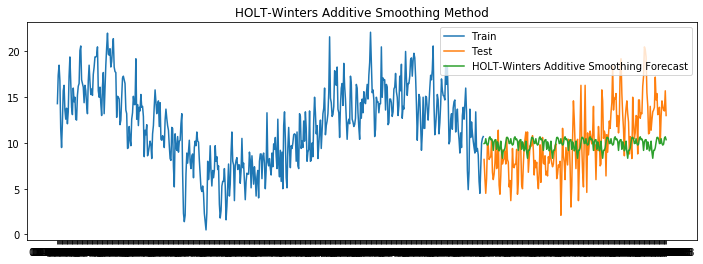

In [28]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'],label = 'Train')
plt.plot(test['Temperature(Min)'],label = 'Test')
plt.plot(y_hat_hwa['HWA_Forecast'],label = 'HOLT-Winters Additive Smoothing Forecast')
plt.legend(loc='best')
plt.title("HOLT-Winters Additive Smoothing Method")
plt.show()

In [29]:
#RMSE
rmse_hwa = np.sqrt(mean_squared_error(test["Temperature(Min)"], y_hat_hwa['HWA_Forecast'])).round(2)
#MAPE
mape_hwa = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_hwa['HWA_Forecast'])/test['Temperature(Min)'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['HOLT-Winters Additive Smoothing Method'],"MAPE":[mape_hwa],'RMSE':[rmse_hwa]})
result1 = pd.concat([result,tempresults1])
result1

,Methods,MAPE,RMSE
0,Simple Exponential Smoothing Method,30.24,3.56
0,HOLT's Exponential Smoothing Method,34.41,3.45
0,HOLT-Winters Additive Smoothing Method,32.83,3.50


## Holt-Winters Multiplicative Method with Trend and Seasonality

In [52]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']), seasonal_periods = 160, trend = 'add', seasonal = 'add')
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_hwm['HWM_Forecast'] = model_fit.forecast(219)

{'smoothing_level': 0.7432682869518099, 'smoothing_slope': 7.475139368037374e-09, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 13.804470831491557, 'initial_slope': 0.0, 'initial_seasons': array([ 6.97464888e-01,  6.14184354e-01,  8.63362180e-01,  5.29249139e-01,
        7.76439042e-02,  1.59084822e+00,  4.08220097e+00,  3.05574231e+00,
        3.10176599e+00,  2.76289815e+00,  1.77162202e+00,  5.00109309e-01,
        4.03116446e-01,  1.52159878e+00,  4.34503349e+00,  4.47490095e+00,
        2.60486325e+00,  1.52837433e+00,  2.88981523e-01,  2.03555976e+00,
        3.33570653e+00,  4.27025549e+00,  2.38862681e+00,  4.49828660e+00,
        3.87206069e+00,  2.82649077e+00,  2.60805222e+00,  3.49445568e+00,
        5.09687074e+00,  5.23432188e+00,  4.63685323e+00,  6.32451043e+00,
        4.96167099e+00,  4.16415316e+00,  2.29076858e+00,  1.22346382e+00,
        1.46811065e+00,  3.84417740e+00,  5.90106089e+00,  5.37880510e+00,
        4.65984164e+00,  3.73902293e+00, 

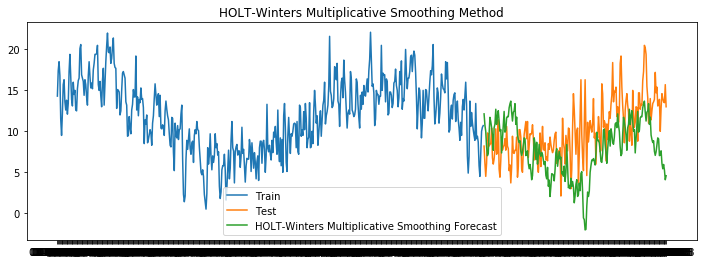

In [53]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'],label = 'Train')
plt.plot(test['Temperature(Min)'],label = 'Test')
plt.plot(y_hat_hwm['HWM_Forecast'],label = 'HOLT-Winters Multiplicative Smoothing Forecast')
plt.legend(loc='best')
plt.title("HOLT-Winters Multiplicative Smoothing Method")
plt.show()

In [54]:
#RMSE
rmse_hwm = np.sqrt(mean_squared_error(test["Temperature(Min)"], y_hat_hwm['HWM_Forecast'])).round(2)
#MAPE
mape_hwm = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_hwm['HWM_Forecast'])/test['Temperature(Min)'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['HOLT-Winters Multiplicative Smoothing Method'],"MAPE":[mape_hwm],'RMSE':[rmse_hwm]})
result2 = pd.concat([result1,tempresults1])
result2

,Methods,MAPE,RMSE
0,Simple Exponential Smoothing Method,30.24,3.56
0,HOLT's Exponential Smoothing Method,34.41,3.45
0,HOLT-Winters Additive Smoothing Method,32.83,3.50
0,HOLT-Winters Multiplicative Smoothing Method,41.23,4.91
